# Verinin İncelenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Veriler/googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.isnull().sum() # Boş sütun değerlerini görelim

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# Kolon isimlerinin türkçeleştirilmesi
df.columns = ["Uygulama","Kategori","Reyting","İncelemeler","Boyut","İndirme","Tip","Ücret","İçerik_Değerlendirmesi","Türler","Son_Güncelleme","Güncel_ver","Android_ver"]

In [7]:
df.shape

(10841, 13)

In [8]:
df.dtypes

Uygulama                   object
Kategori                   object
Reyting                   float64
İncelemeler                object
Boyut                      object
İndirme                    object
Tip                        object
Ücret                      object
İçerik_Değerlendirmesi     object
Türler                     object
Son_Güncelleme             object
Güncel_ver                 object
Android_ver                object
dtype: object

# Eksik Verilerin Görselleştirilmesi

<Axes: >

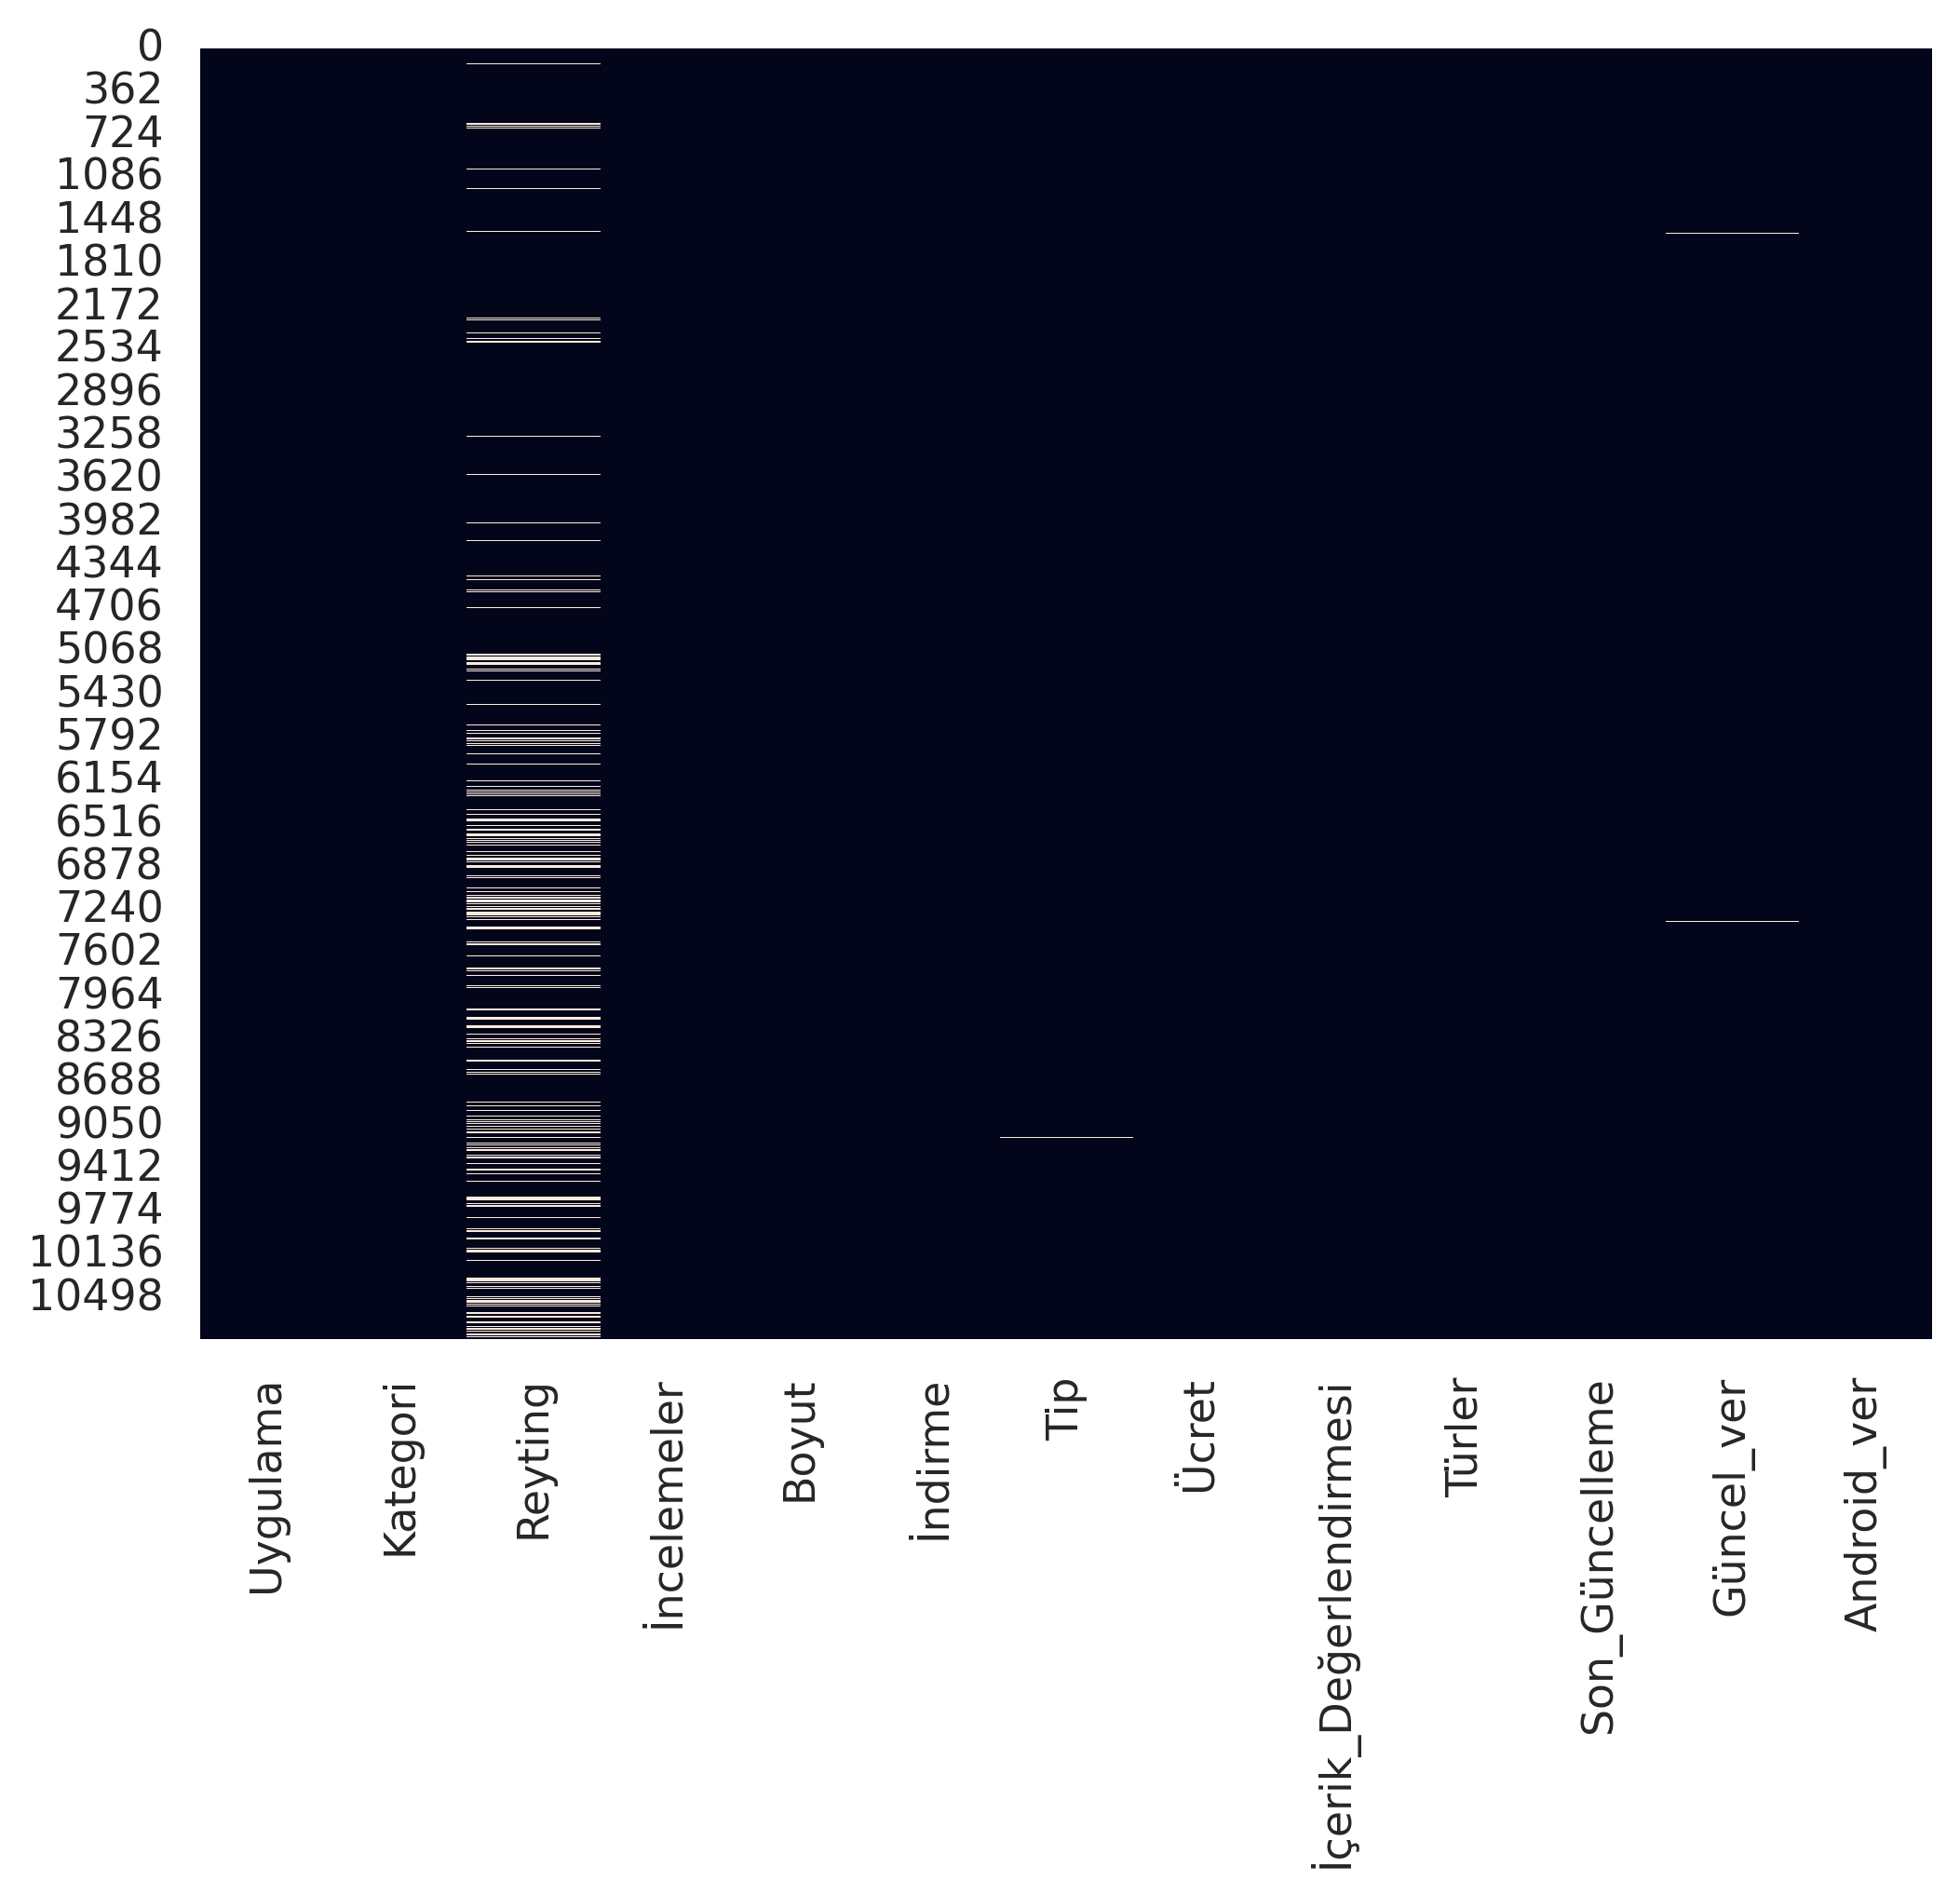

In [9]:
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(8,6)})
sns.heatmap(df.isnull(),cbar=False)

# Eksik Verilerin Giderilmesi

In [10]:
reyting_medyan = df["Reyting"].median()

In [11]:
reyting_medyan

4.3

In [12]:
# Rating kolonundaki boş değerleri medyan ile doldurma
df["Reyting"].fillna(reyting_medyan, inplace=True)

In [13]:
df.isnull().sum()

Uygulama                  0
Kategori                  0
Reyting                   0
İncelemeler               0
Boyut                     0
İndirme                   0
Tip                       1
Ücret                     0
İçerik_Değerlendirmesi    1
Türler                    0
Son_Güncelleme            0
Güncel_ver                8
Android_ver               3
dtype: int64

In [14]:
# Boş olan satır sayısı az olduğundan dolayı diğer boş satırları silebiliriz
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Uygulama                10829 non-null  object 
 1   Kategori                10829 non-null  object 
 2   Reyting                 10829 non-null  float64
 3   İncelemeler             10829 non-null  object 
 4   Boyut                   10829 non-null  object 
 5   İndirme                 10829 non-null  object 
 6   Tip                     10829 non-null  object 
 7   Ücret                   10829 non-null  object 
 8   İçerik_Değerlendirmesi  10829 non-null  object 
 9   Türler                  10829 non-null  object 
 10  Son_Güncelleme          10829 non-null  object 
 11  Güncel_ver              10829 non-null  object 
 12  Android_ver             10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [16]:
df["İncelemeler"] = df["İncelemeler"].astype("int64")

# Hatalı Verilerin Düzeltilmesi

In [17]:
df["Boyut"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [18]:
# Boyut kolonundaki harf karakterleri veriden temizleyelim
df["Boyut"].replace("M","",inplace=True, regex=True)
df["Boyut"].replace("k","",inplace=True, regex=True)

In [19]:
df["Boyut"].replace("Varies with device",reyting_medyan, inplace=True)

In [20]:
# Boyut kolonunun tipini sayısala çevirelim
df.Boyut = pd.to_numeric(df.Boyut)

In [21]:
df["İndirme"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [22]:
# İndirme kolonundaki harf karakterlerini veriden temizleyelim
df["İndirme"].replace("\\+","",inplace=True,regex=True)
df["İndirme"].replace(",","",inplace=True,regex=True)

In [23]:
df.İndirme.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [24]:
# İndirme kolonunun tipini sayısala çevirelim
df["İndirme"] = df["İndirme"].astype("int64")

In [25]:
df["Ücret"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
# Ücret kolonundaki hatalı karakterleri temizle
df["Ücret"]=df["Ücret"].str.replace("$","")

<ipython-input-26-02d4f625ead2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Ücret"]=df["Ücret"].str.replace("$","")


In [27]:
df.Ücret.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [28]:
# Ücret kolonunun tipini sayısala çevirelim
df["Ücret"] = df["Ücret"].astype("float64")

In [29]:
df["Türler"].head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Türler, dtype: object

In [30]:
# Uygulama türlerindeki hatalı isimleri düzeltelim
df["Türler"] = df["Türler"].str.split(";").str[0]

In [31]:
df["Türler"].value_counts()

Tools                      841
Entertainment              666
Education                  644
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Dating                     234
Books & Reference          233
Simulation                 218
Video Players & Editors    178
Puzzle                     166
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [32]:
# Uzun tür ismini anlamlı kısa isme çevirme
df["Türler"].replace("Music & Audio","Music",inplace=True)

In [33]:
df["Son_Güncelleme"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Son_Güncelleme, Length: 10829, dtype: object

In [34]:
# Güncelleme kolonundaki değerleri tarih formatına çevirelim
df["Son_Güncelleme"] = pd.to_datetime(df["Son_Güncelleme"])

In [35]:
df["Son_Güncelleme"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Son_Güncelleme, Length: 10829, dtype: datetime64[ns]

# Verilerin Görselleştirilmesi

<Axes: >

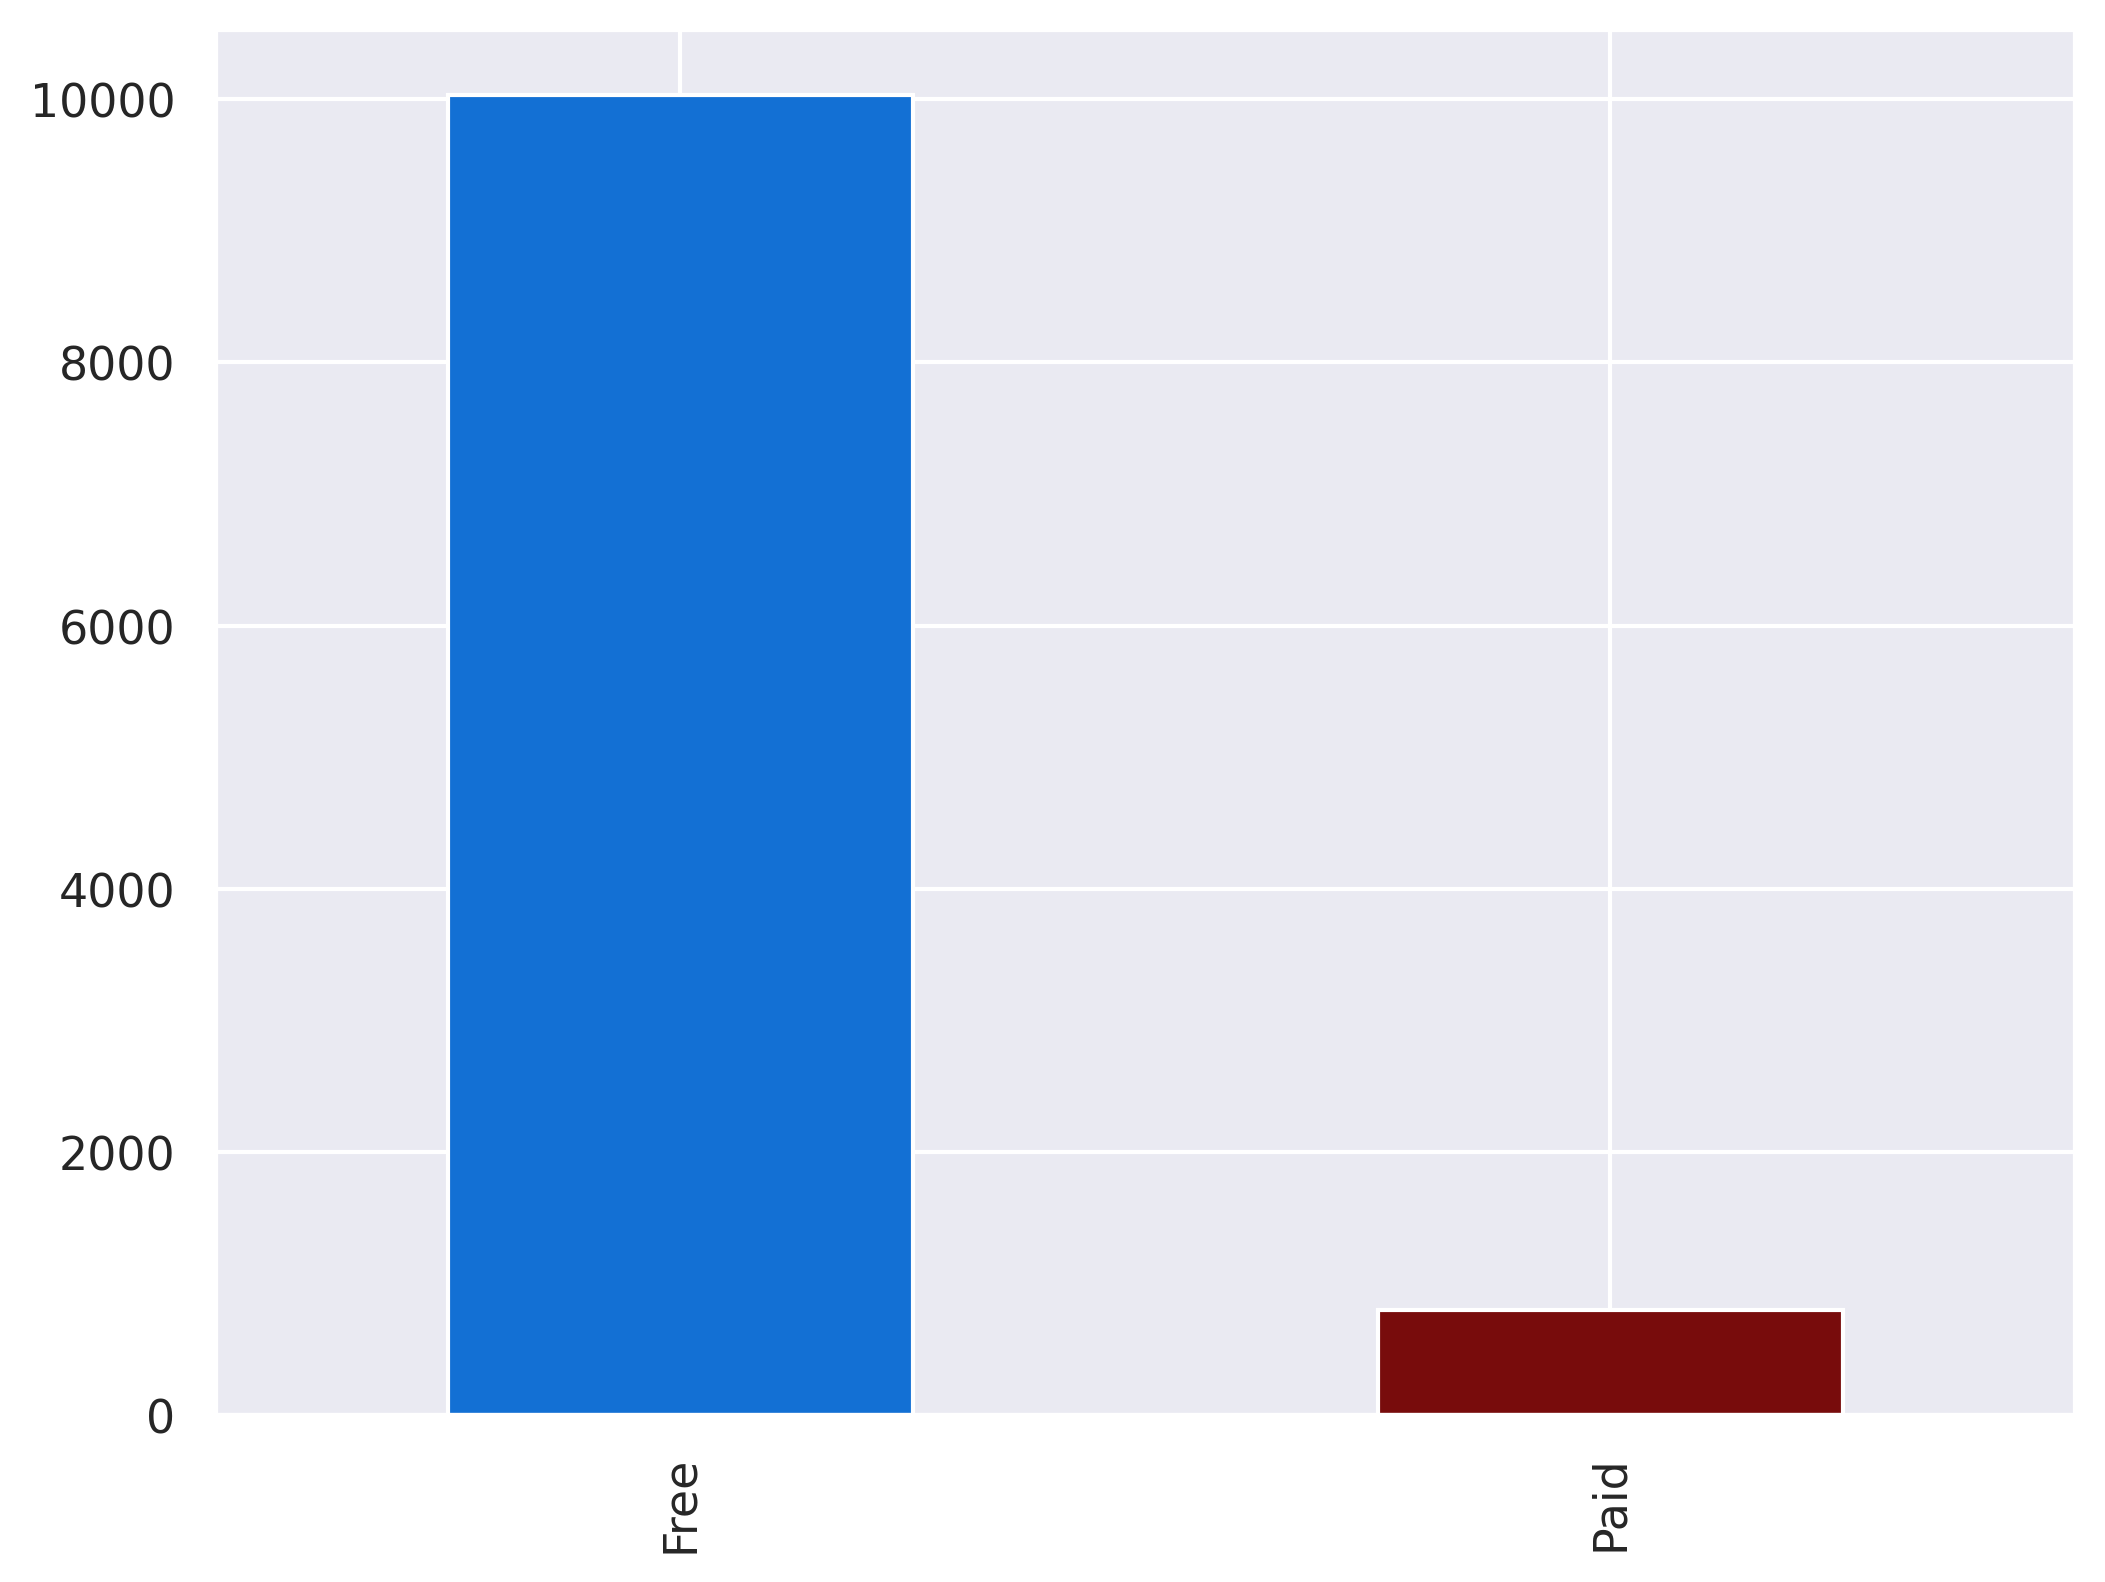

In [36]:
# Uygulamaların tiplerine(ücretli/ücretsiz) göre görselleştirilmesi
df["Tip"].value_counts().plot(kind="bar",color=["#1370d4","#780c0c"])

Text(0, 0.5, 'Reyting')

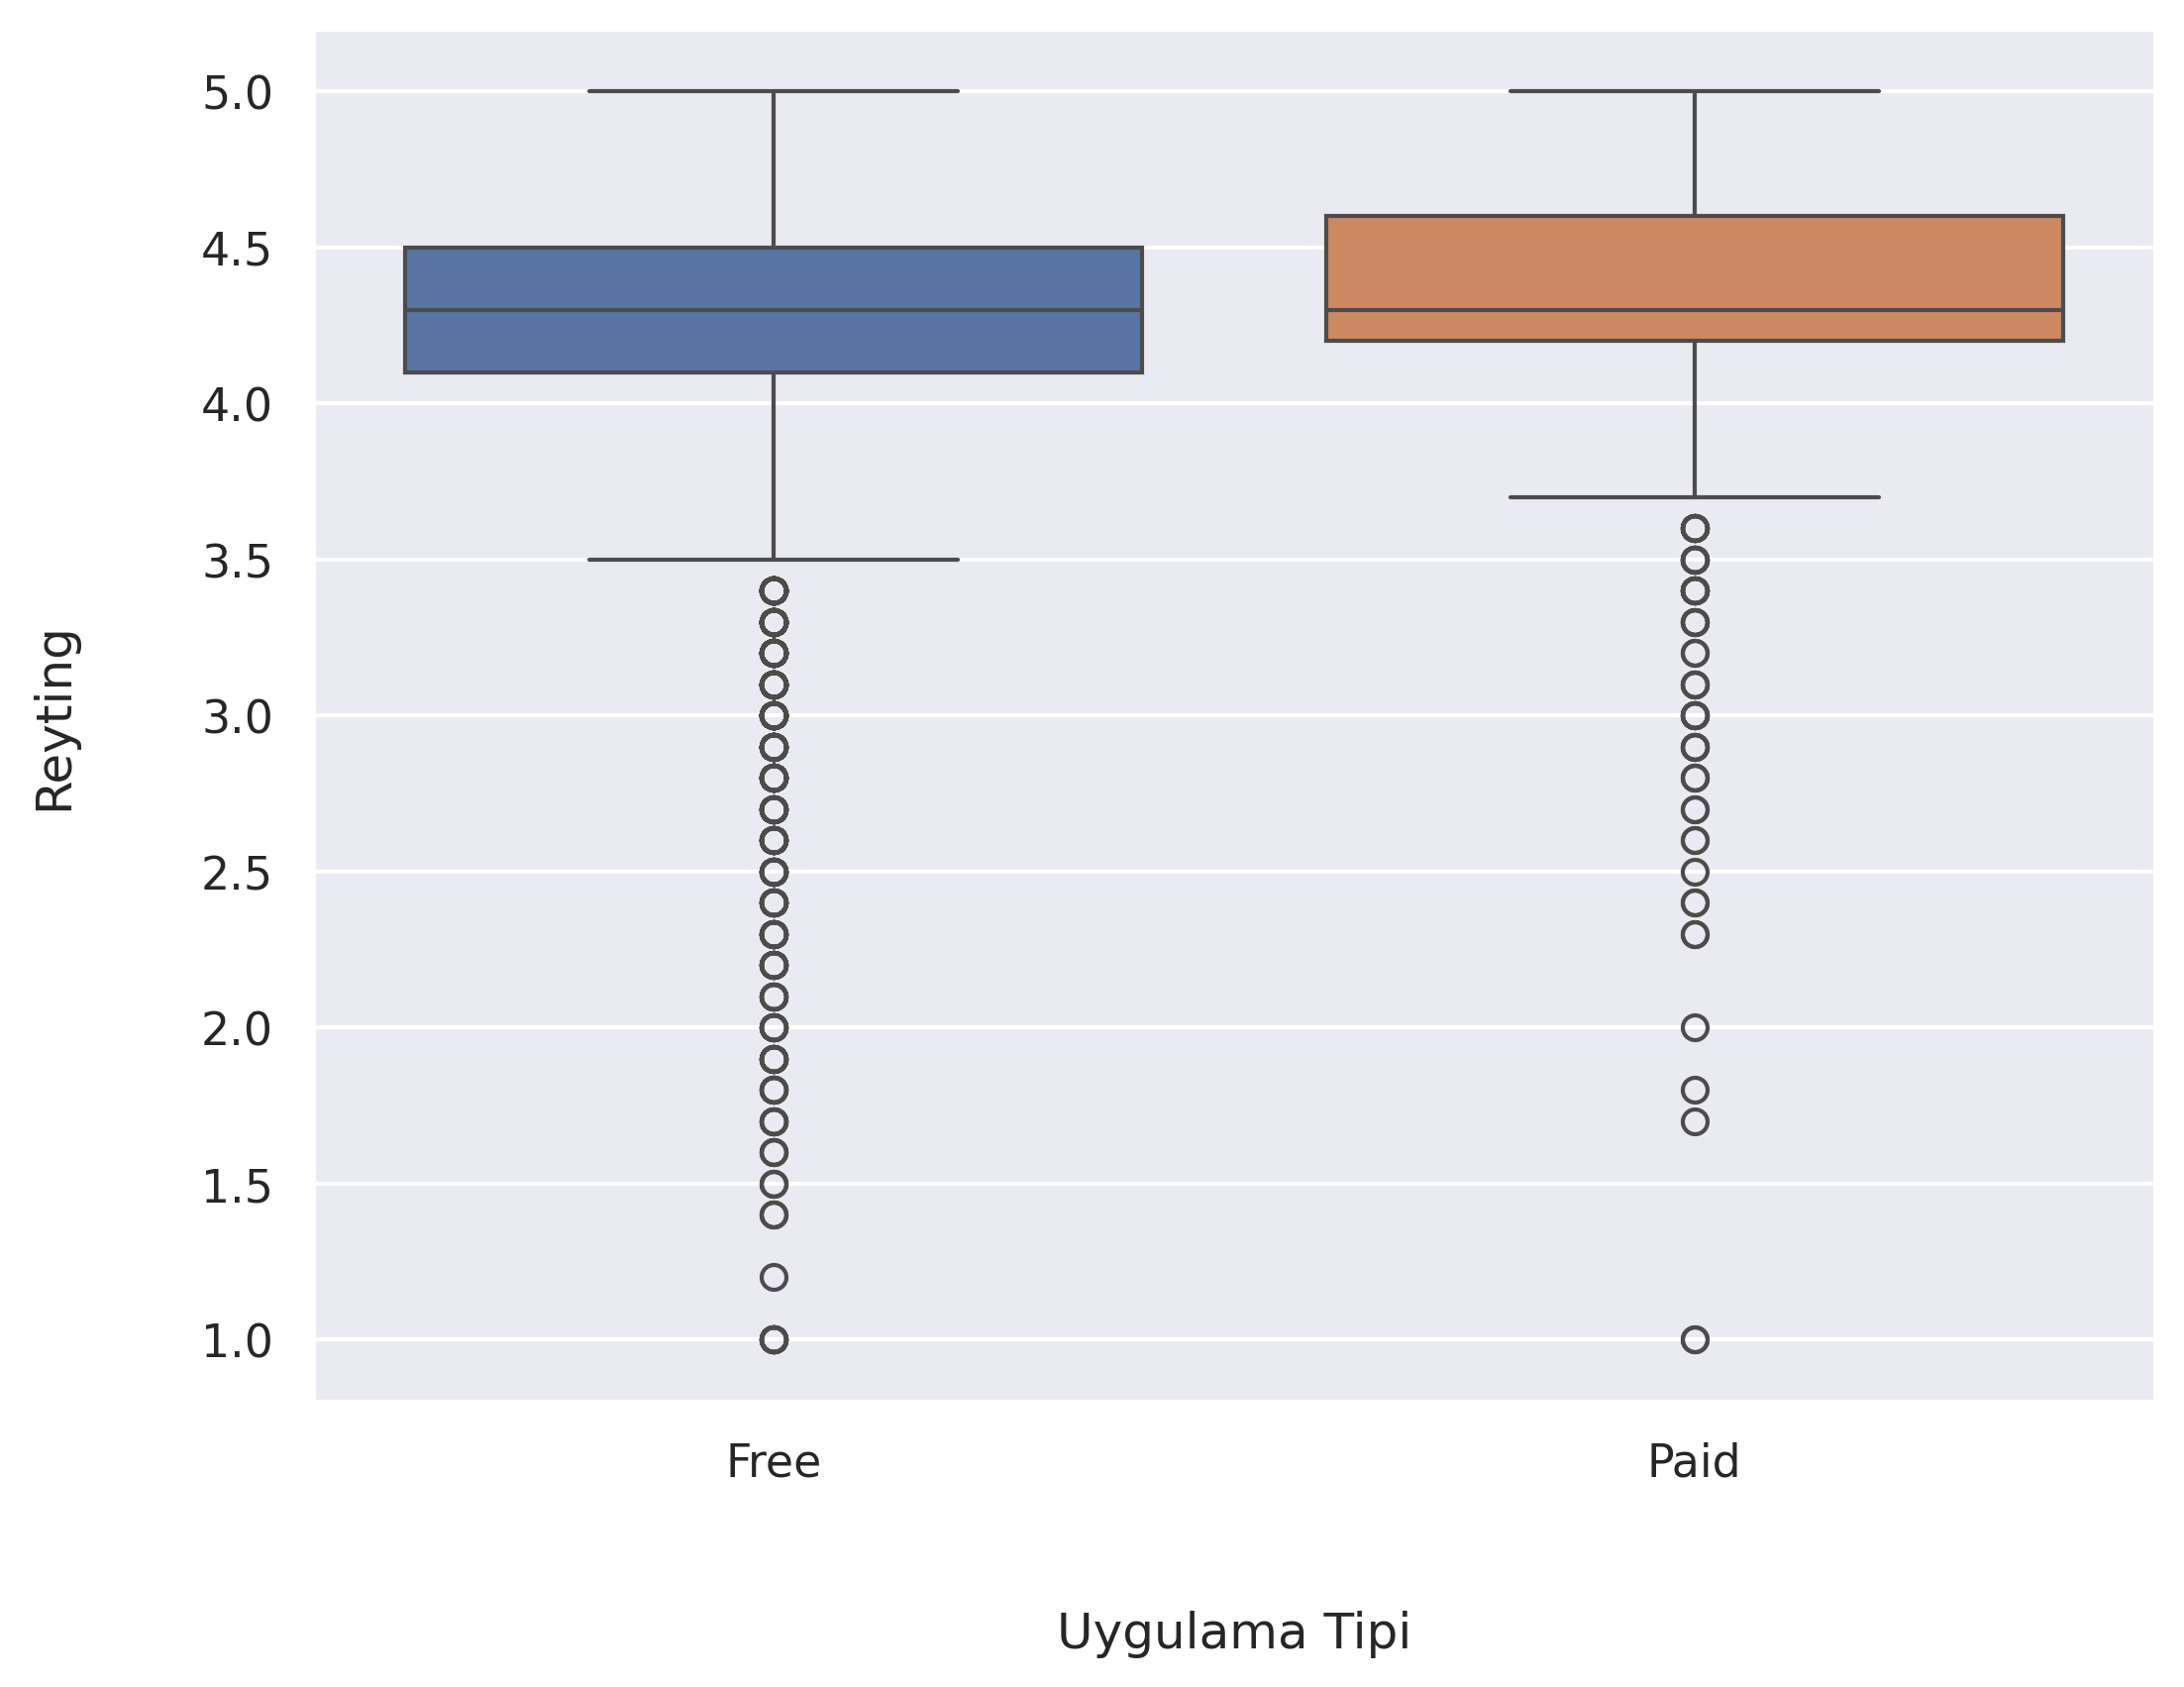

In [37]:
# Uygulamaların ücret durumuna göre ratinglerinin görselleştirilmesi
sns.boxplot(x="Tip",y="Reyting",data=df, hue="Tip")
plt.xlabel("Uygulama Tipi",labelpad=30)
plt.ylabel("Reyting",labelpad=30)

Text(0, 0.5, 'Reyting')

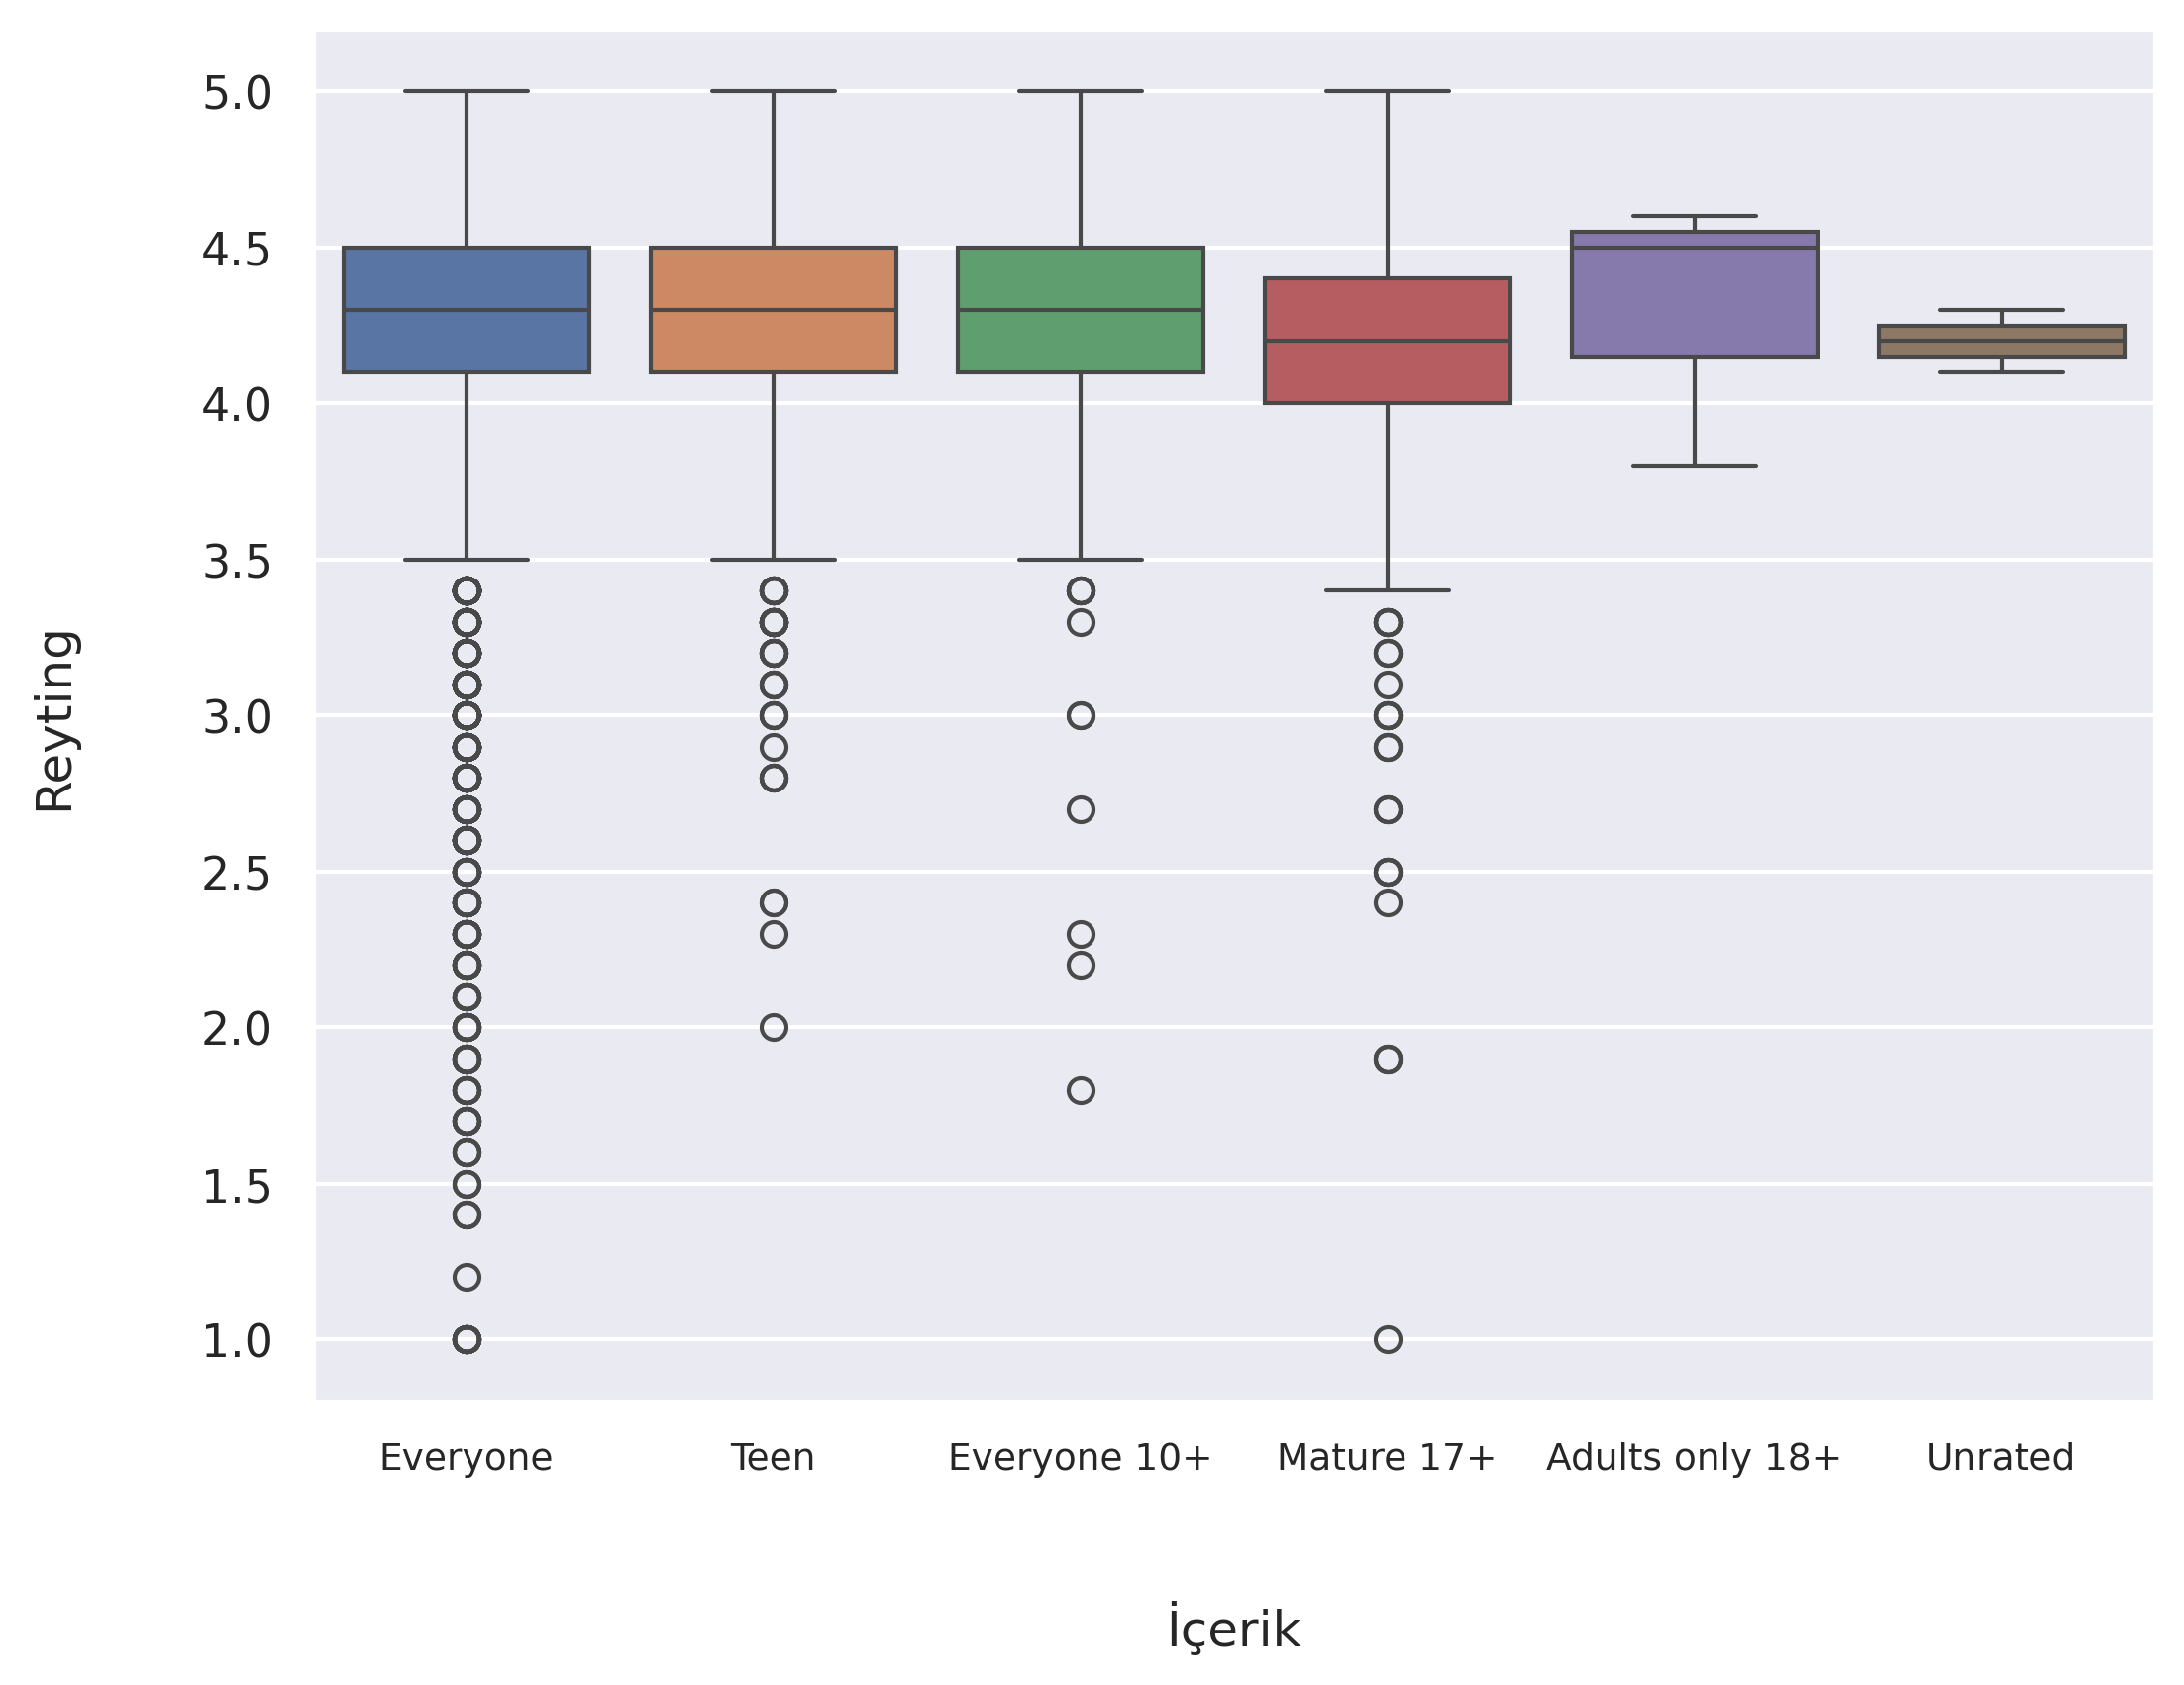

In [38]:
# İçeriklerine göre ratinglerin görselleştirilmesi
sns.boxplot(x="İçerik_Değerlendirmesi",y="Reyting",data=df,hue="İçerik_Değerlendirmesi")
plt.xticks(fontsize=9)
plt.xlabel("İçerik",labelpad=30)
plt.ylabel("Reyting",labelpad=30)

<ipython-input-39-2d8212bb890d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_num.values, y=cat_num.index, palette="Set2")


Text(0.5, 1.0, 'Kategorilerde Bulunan Uygulama Sayısı')

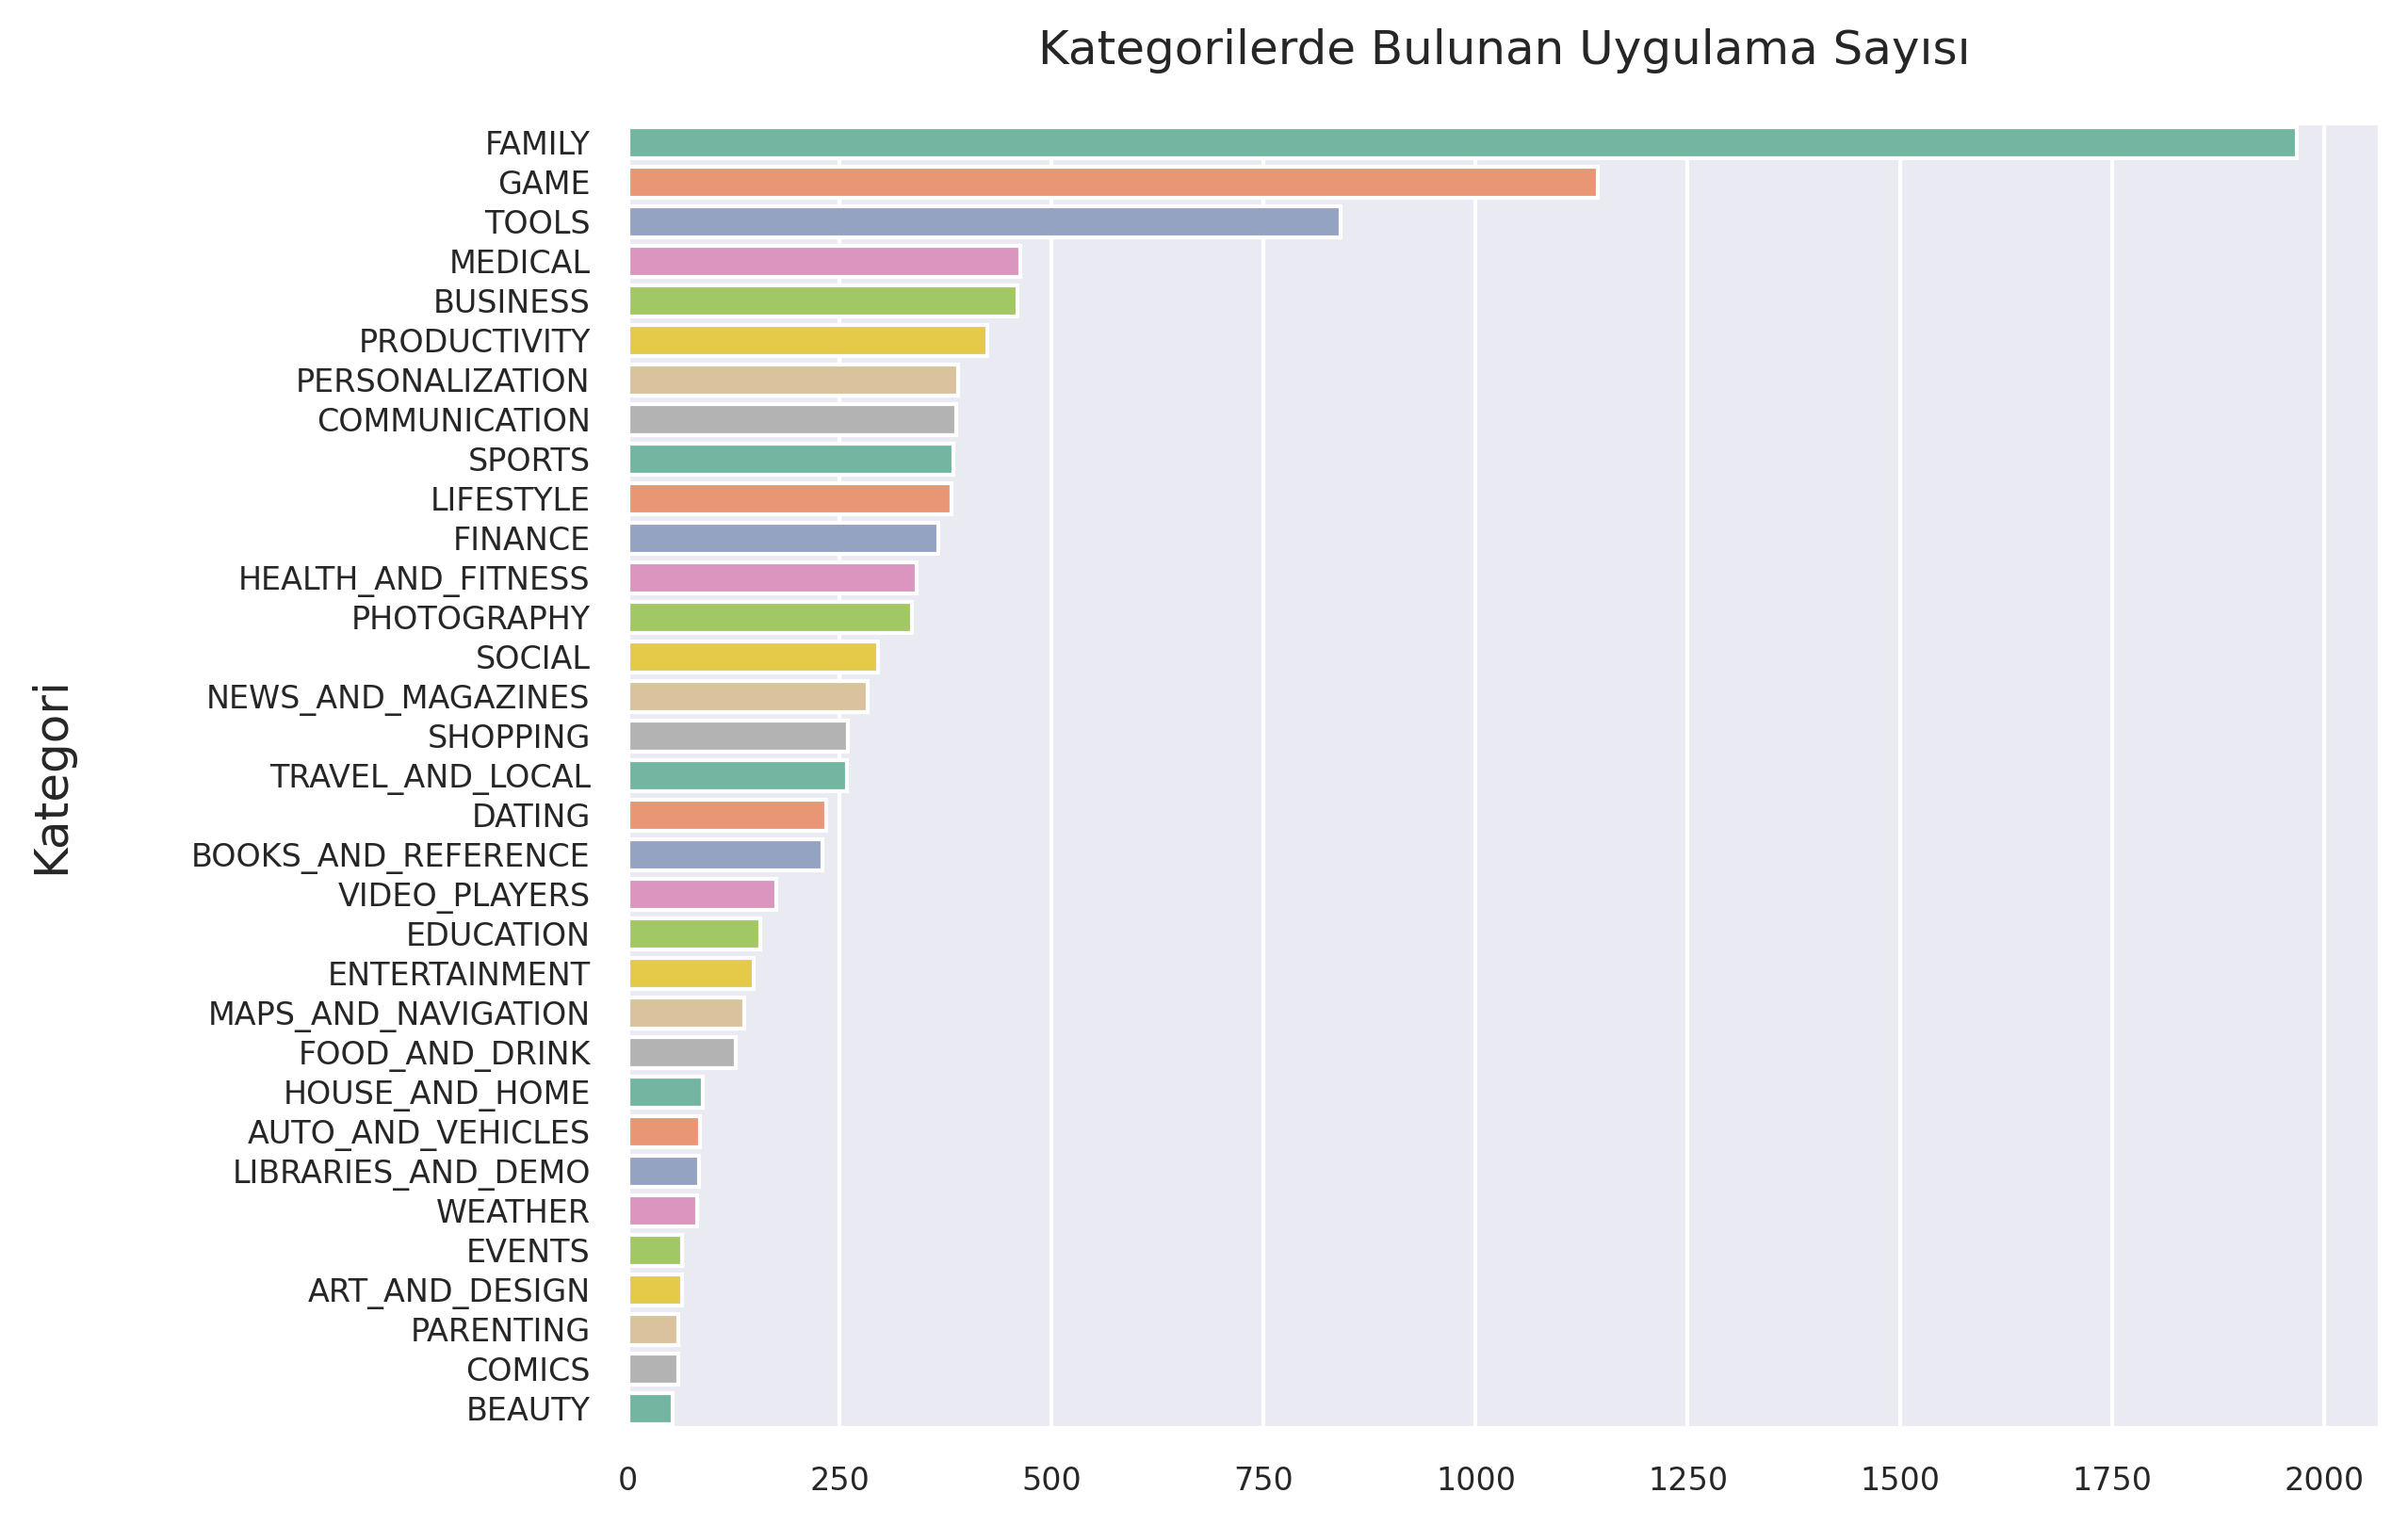

In [39]:
cat_num = df["Kategori"].value_counts()
sns.barplot(x=cat_num.values, y=cat_num.index, palette="Set2")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("Kategori", labelpad=30)
plt.title("Kategorilerde Bulunan Uygulama Sayısı",pad=15)

Text(0.5, 1.0, 'Kategorilere Göre Ücret Dağılımı')

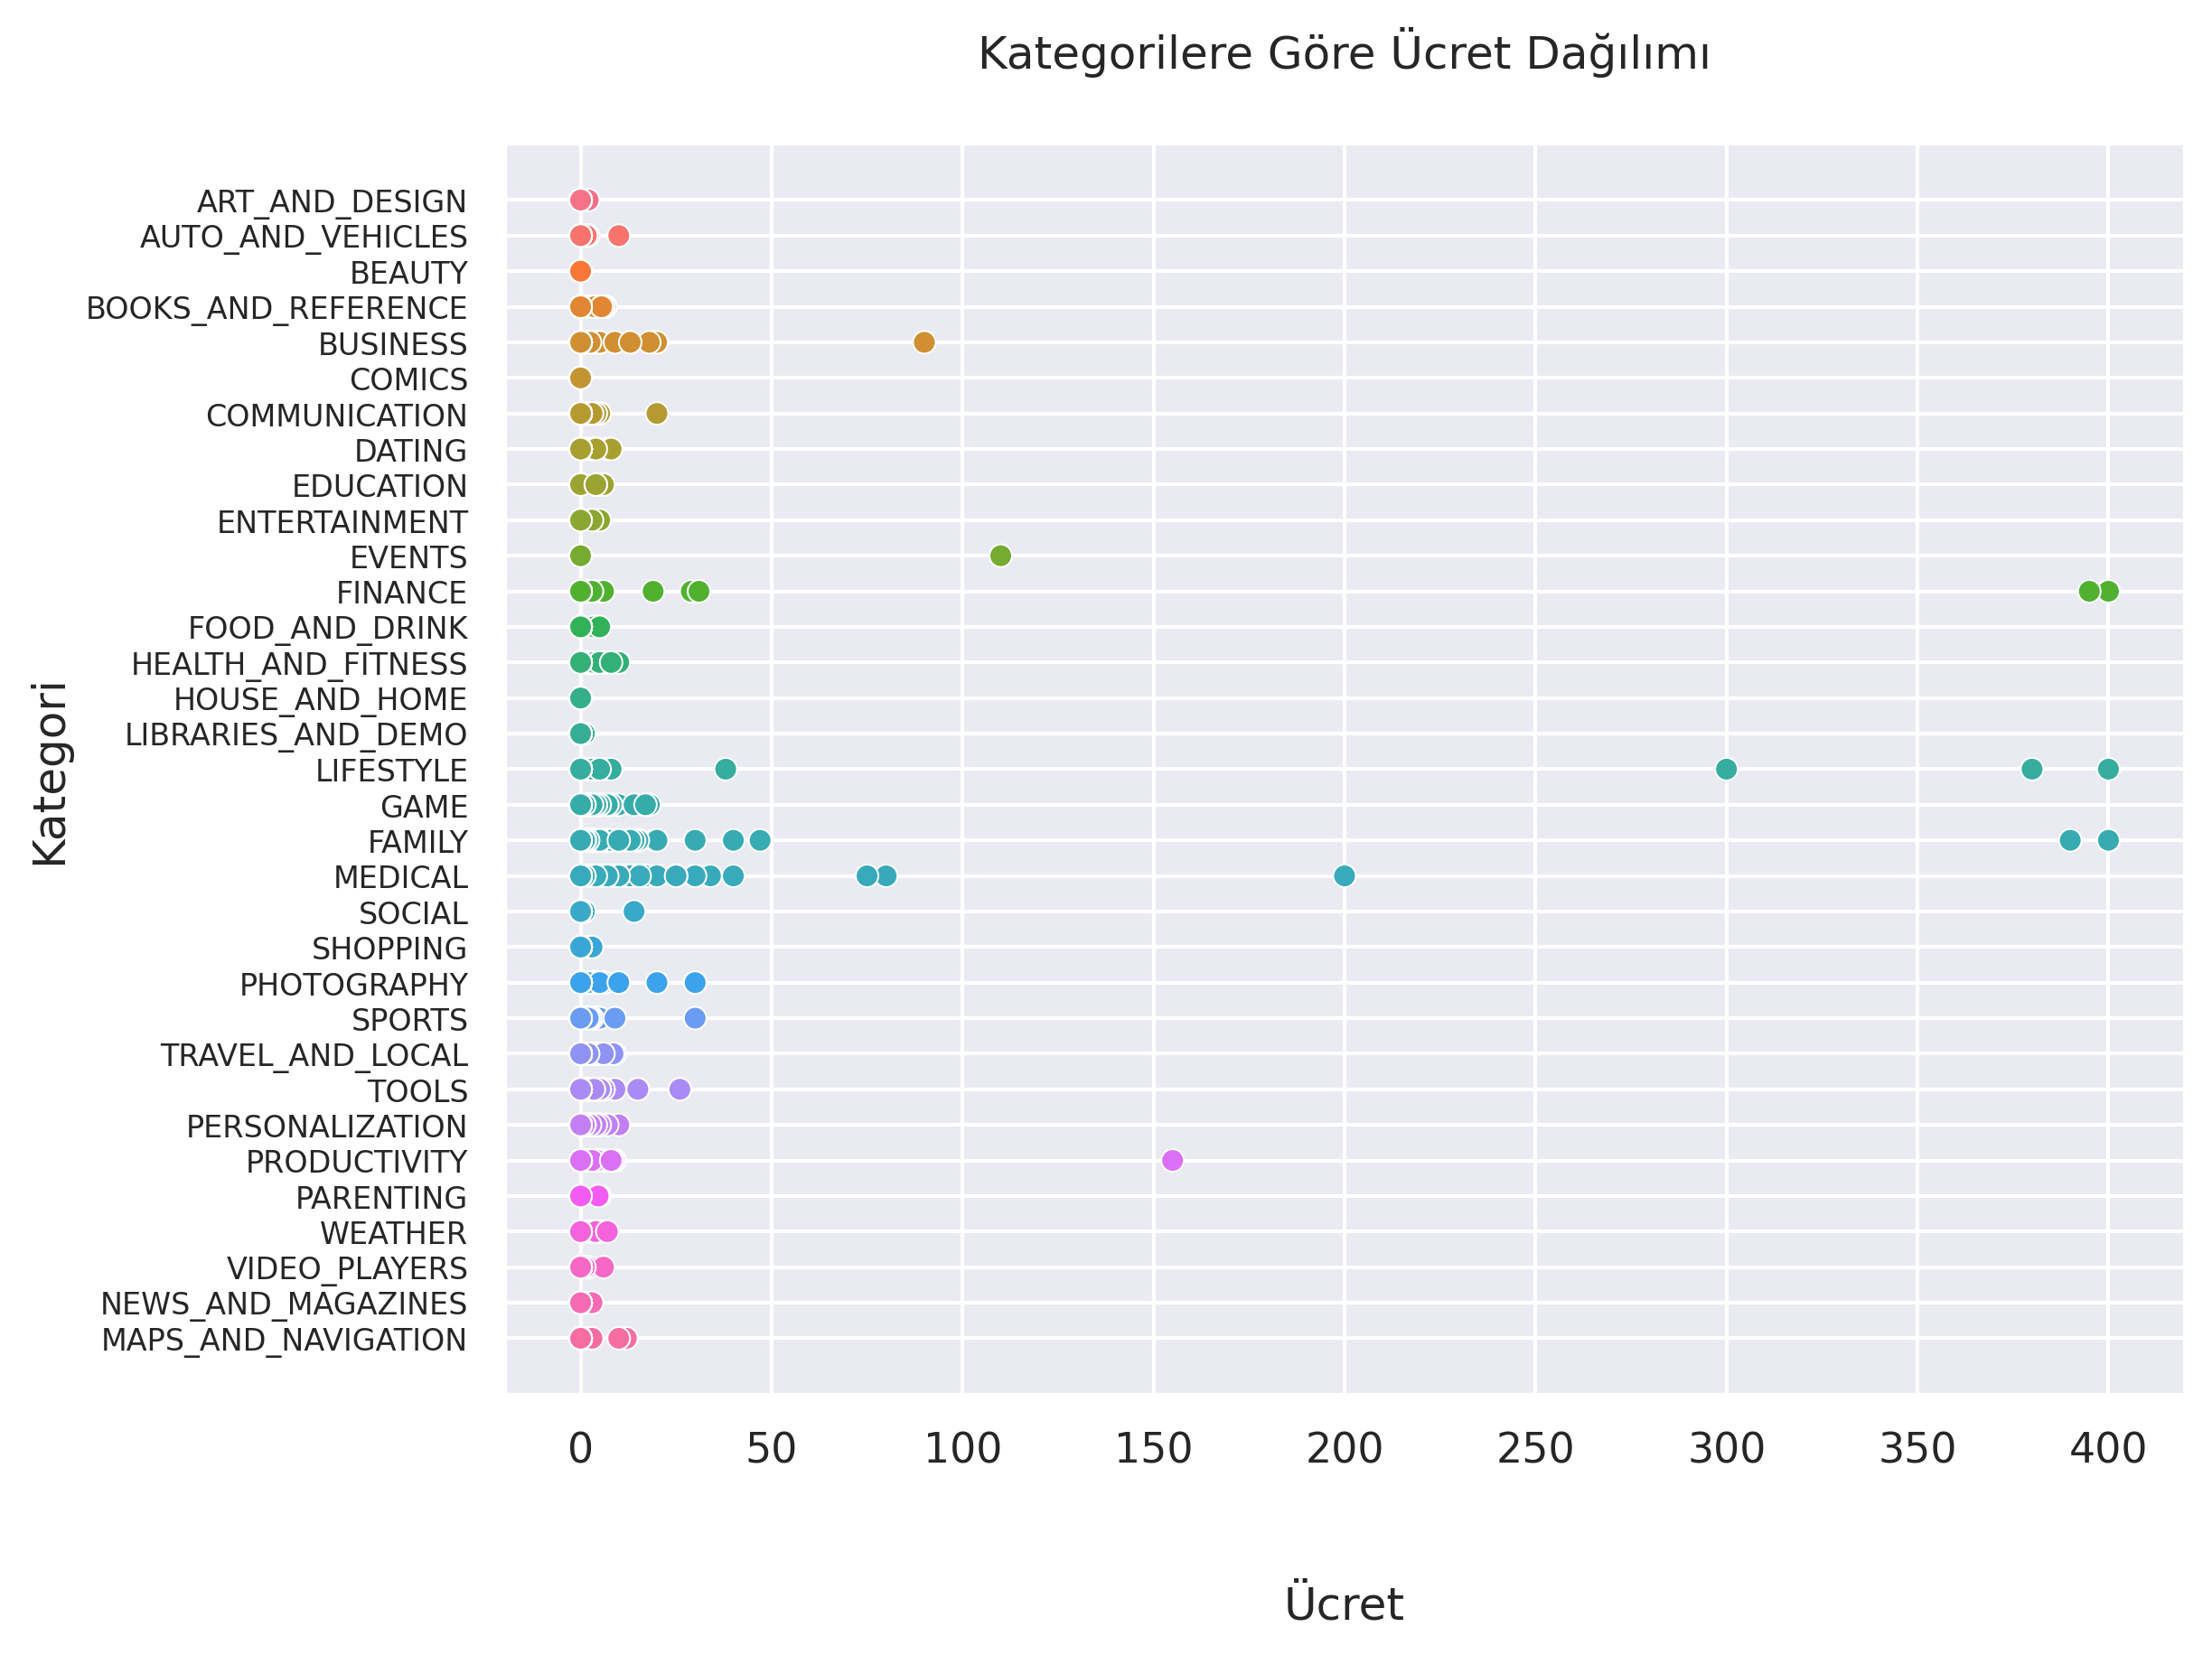

In [40]:
# Kategorilerin fiyatlandırmaya göre dağılımı
sns.scatterplot(data = df , y="Kategori", x="Ücret", hue="Kategori", legend=False)
plt.yticks(fontsize=8)
plt.xlabel("Ücret",labelpad=30,fontsize=12)
plt.title("Kategorilere Göre Ücret Dağılımı", pad=20)

<ipython-input-41-479875278dda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt=".2f", cmap="mako")


<Axes: >

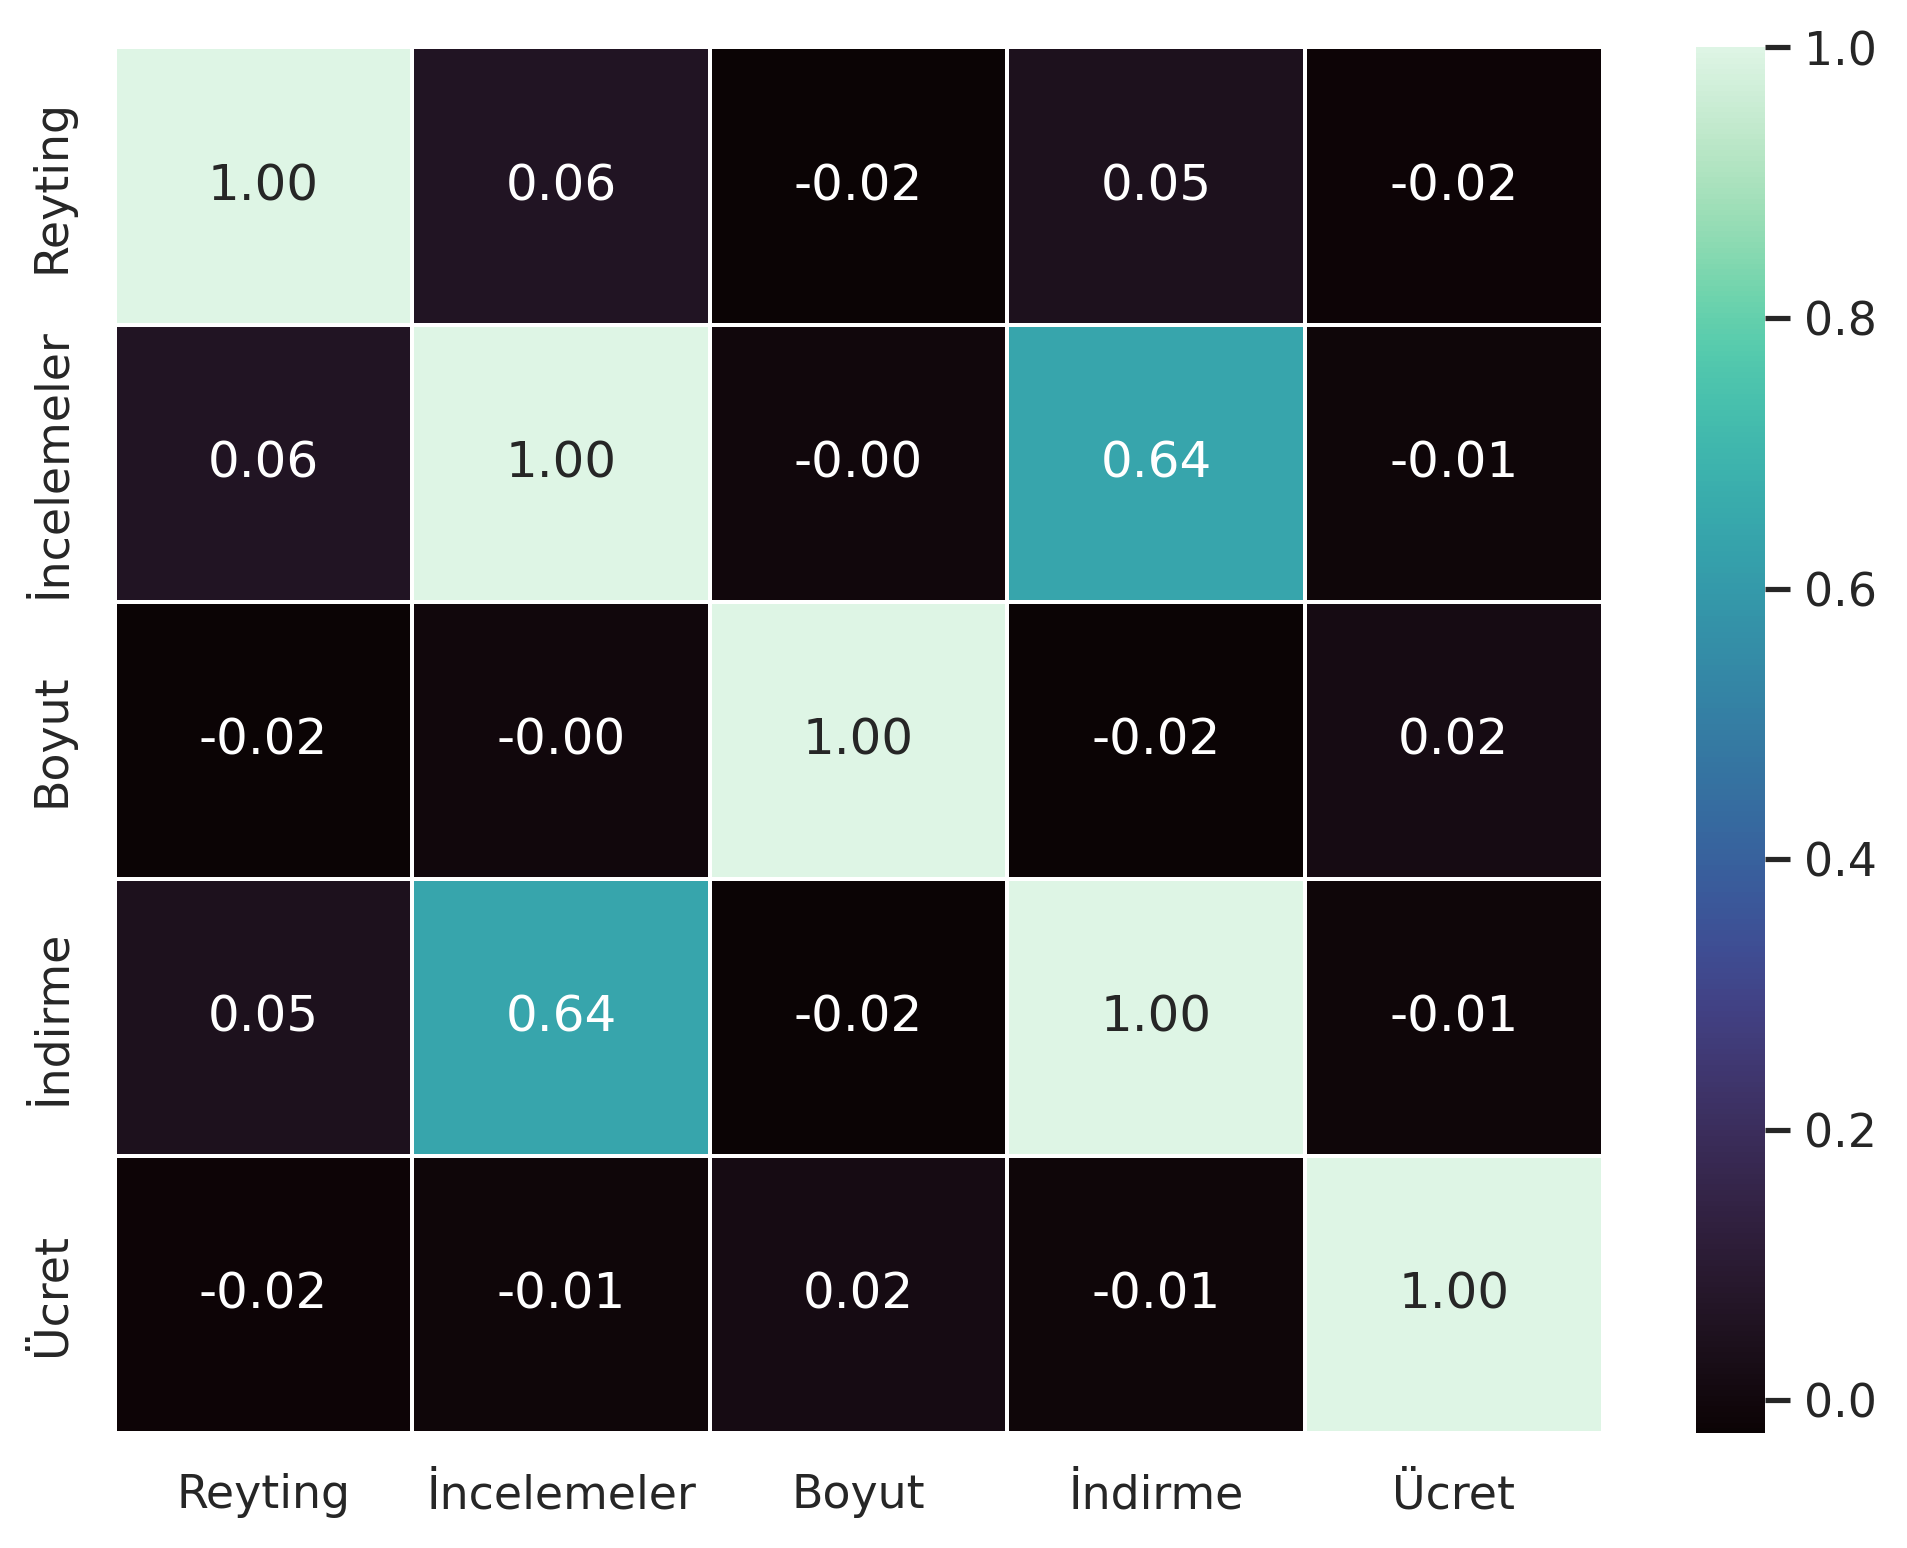

In [41]:
# Korelasyon Haritasını oluşturalım
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt=".2f", cmap="mako")